In [3]:
#!pip install scipy
import tensorflow as tf
import matplotlib.image as img
import numpy as np
import os
import matplotlib.pyplot as plt
import shutil
#from tensorflow.keras.preprocessing import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import scipy
#Image flow from directory, data image gen
#from skimage import io, color, filters
#from skimage.transform import resize, rotate
print(tf.__version__)
print(tf.test.gpu_device_name())
#!pip install tensorflow_datasets
!nvidia-smi

2.3.1
/device:GPU:0
Thu Dec  3 03:12:51 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.80.02    Driver Version: 450.80.02    CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            On   | 00000000:00:1E.0 Off |                    0 |
| N/A   56C    P0    28W /  70W |    256MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                    

In [4]:
os.listdir('../data/meta/')

['meta']

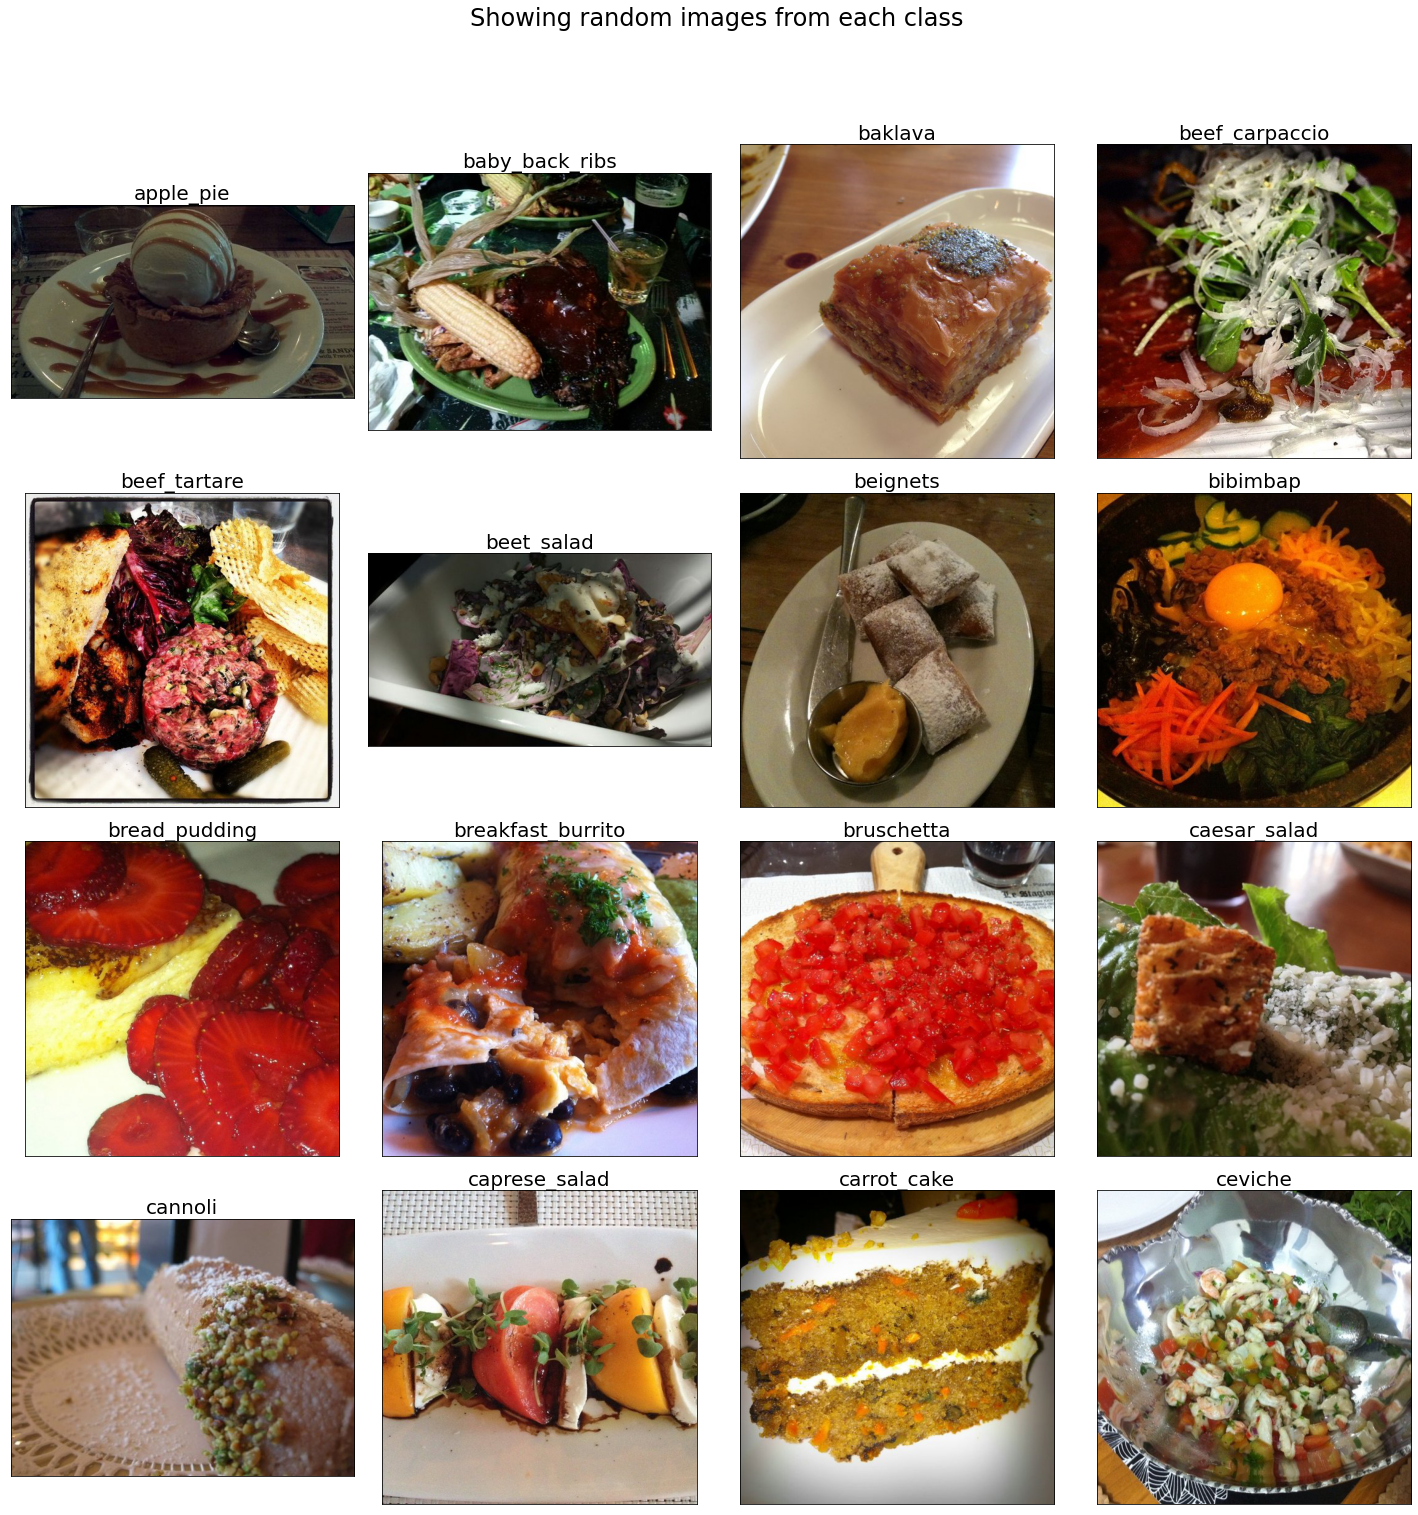

In [2]:
def show_all_images(ax,title,row,col):
    fig, ax = plt.subplots(row,col, figsize=(20,20))
    fig.suptitle(title,fontsize=24, y=1.05)
    data_loc = '../data/images/'
    accum = 0
    sorted_pics = sorted(os.listdir(data_loc))
    for i in range(row):
        for j in range(col):
            food_selected = sorted_pics
            food = food_selected[accum]
            accum +=1 

            # returns the list of all files 
            food_images = os.listdir(os.path.join(data_loc,food)) # joins the dir to food selected
            food_images_random = np.random.choice(food_images) # then choses a random image inside of it 
            img = plt.imread(os.path.join(data_loc,food,food_images_random)) # joins the dir to the random image selected
            # img returns matrix acutally 
            ax[i][j].imshow(img)
            ax[i][j].set_title(food, fontsize=20,pad=5)
    plt.setp(ax, xticks=[],yticks=[])
    plt.tight_layout()



show_all_images(10,'Showing random images from each class', 4,4)



# holdout set

In [88]:
sorted_pics = sorted(os.listdir(data_loc))
sorted_pics[1:].to_numpy()

AttributeError: 'list' object has no attribute 'to_numpy'

## Grayscaling 



Converting to grayscale allows us to do more things:

Simplify the classification to shape and lighting only
Maintain some semblance of sampling density (RGB features at 33px = 3267)


In [ ]:
def grayscale(file_location, count):

def show_all_images(ax,title,row,col, filter_):
    fig, ax = plt.subplots(row,col, figsize=(20,20))
    fig.suptitle(title,fontsize=24, y=1.05)
    data_loc = '../data/images/'
    accum = 0
    sorted_pics = sorted(os.listdir(data_loc))
    for i in range(row):
        for j in range(col):
            food_selected = sorted_pics
            food = food_selected[accum]
            accum +=1 

            # returns the list of all files 
            food_images = os.listdir(os.path.join(data_loc,food)) # joins the dir to food selected
            food_images_random = np.random.choice(food_images) # then choses a random image inside of it 
            img = plt.imread(os.path.join(data_loc,food,food_images_random)) # joins the dir to the random image selected
            # img returns matrix acutally 
            ax[i][j].imshow(img)
            ax[i][j].set_title(food, fontsize=20,pad=5)
    plt.setp(ax, xticks=[],yticks=[])
    plt.tight_layout()



show_all_images(10,'Showing random images from each class', 4,4,filter_)

In [11]:

def test_split(rootdir):
    root_dir = rootdir
    """
    # train dirs
    for food in os.listdir(os.path.join(root_dir,'images')):
        os.makedirs(root_dir +'/train/' + food)
    # test dirs
    for food in os.listdir(os.path.join(root_dir,"images")):
        os.makedirs(root_dir + "/test/" + food)
    # var dirs
    for food in os.listdir(os.path.join(root_dir,"images")):
        os.makedirs(root_dir + "/var/" + food)
    """
    food_names = os.listdir(os.path.join(root_dir,'images'))
    for food in food_names:
        currentCls = food
        src = os.path.join(root_dir,'images',currentCls) # Folder to copy images from

        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames)*0.7), int(len(allFileNames)*0.85)])

        train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
        val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]
        test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
        
        print('Total images: ', len(allFileNames))
        print('Training: ', len(train_FileNames))
        print('Validation: ', len(val_FileNames))
    
        for name in train_FileNames:
            shutil.copy(name, root_dir+"/train/"+currentCls)

        for name in val_FileNames:
            shutil.copy(name, root_dir+"/var/"+currentCls)

        for name in test_FileNames:
            shutil.copy(name, root_dir+"/test/"+currentCls)
            
            

print(test_split('../data'))
    
    

Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images:  1000
Training:  700
Validation:  150
Total images

In [14]:
os.read_txt('../data/meta/meta/classes.txt')

AttributeError: module 'os' has no attribute 'read_txt'

In [3]:
labels_all= '''apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito
bruschetta
caesar_salad
cannoli
caprese_salad
carrot_cake
ceviche
cheesecake
cheese_plate
chicken_curry
chicken_quesadilla
chicken_wings
chocolate_cake
chocolate_mousse
churros
clam_chowder
club_sandwich
crab_cakes
creme_brulee
croque_madame
cup_cakes
deviled_eggs
donuts
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
fish_and_chips
foie_gras
french_fries
french_onion_soup
french_toast
fried_calamari
fried_rice
frozen_yogurt
garlic_bread
gnocchi
greek_salad
grilled_cheese_sandwich
grilled_salmon
guacamole
gyoza
hamburger
hot_and_sour_soup
hot_dog
huevos_rancheros
hummus
ice_cream
lasagna
lobster_bisque
lobster_roll_sandwich
macaroni_and_cheese
macarons
miso_soup
mussels
nachos
omelette
onion_rings
oysters
pad_thai
paella
pancakes
panna_cotta
peking_duck
pho
pizza
pork_chop
poutine
prime_rib
pulled_pork_sandwich
ramen
ravioli
red_velvet_cake
risotto
samosa
sashimi
scallops
seaweed_salad
shrimp_and_grits
spaghetti_bolognese
spaghetti_carbonara
spring_rolls
steak
strawberry_shortcake
sushi
tacos
takoyaki
tiramisu
tuna_tartare
waffles'''
user_words = labels_all
word_list = user_words.split()
user_words = []
for word in word_list:
    user_words.append(word)
user_words = " ".join(user_words)
class_labels = user_words.split()

In [19]:
# 
X = image_dataset_from_directory(
    '../data/train/',
    labels="inferred",
    label_mode="categorical",
    class_names=class_labels,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)


Found 70700 files belonging to 101 classes.


Found 3500 images belonging to 5 classes.
Found 0 images belonging to 5 classes.
Found 750 images belonging to 5 classes.
These waffles have been: height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True


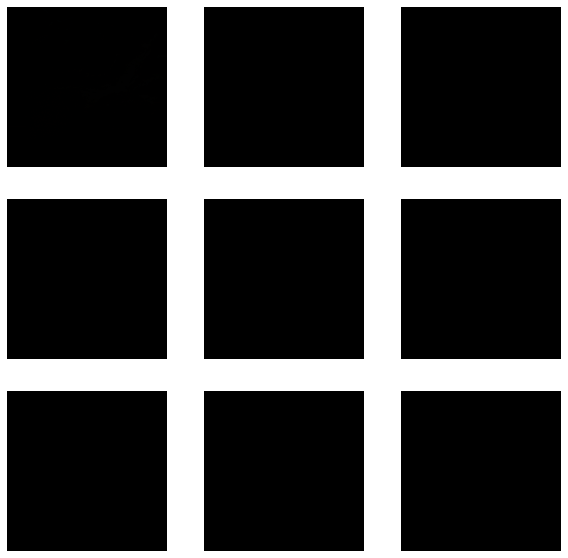

In [2]:
# making only 5 classes

# agumentations (rotation_range=90, rescale=1./255,rotation_range=90,height_shift_range=0.5,shear_range=0.1, zoom_range=0.1, horizontal_flip=True))

X5_train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=10,
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2]) # brightness)
X5_test_datagen = ImageDataGenerator(rescale=1./255)
X5_var_datagen = ImageDataGenerator(rescale=1./255)

labels_5 = ['apple_pie','waffles','gnocchi','chocolate_mousse','baklava']

X5_train = X5_train_datagen.flow_from_directory(
    '../data/train_mini/',
    target_size=(256,256),
    color_mode="rgb",
    classes=labels_5,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)

X5_test = X5_test_datagen.flow_from_directory(
    '../data/test_mini/',
    target_size=(256,256),
    color_mode="rgb",
    classes=labels_5,
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)
X5_var = X5_var_datagen.flow_from_directory(
    '../data/var_mini/',
    target_size=(256,256),
    color_mode="rgb",
    classes=labels_5,
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)


# train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1./255)
# train_generator = train_datagen.flow_from_directory(
#         'data/train',
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')
# validation_generator = test_datagen.flow_from_directory(
#         'data/validation',
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')
# model.fit(
#         train_generator,
#         steps_per_epoch=2000,
#         epochs=50,
#         validation_data=validation_generator,
#         validation_steps=800)

# example of vertical shift image augmentation
print('These waffles have been: height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True')
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
# load the image
img = load_img('../data/train_mini/waffles/1005755.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
#datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = X5_train_datagen.flow(samples, batch_size=1)
# generate samples and plot
pyplot.title(label='These waffles have bee height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True')
for i in range(9):
    # define subplot
    pyplot.subplot( 330 +1 +i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.minorticks_off()
    pyplot.imshow(image)
    pyplot.axis('off')
    
# show the figure

pyplot.show()

In [4]:
class_names = X5_train.class_names
print(class_names)


AttributeError: 'DirectoryIterator' object has no attribute 'class_names'

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


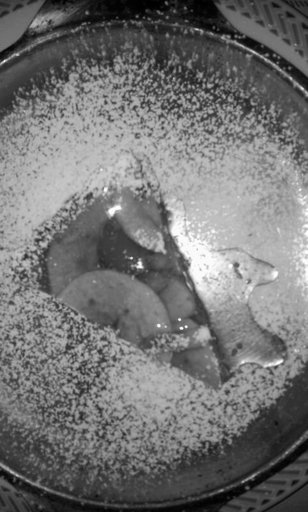

In [7]:

tf.keras.preprocessing.image.load_img(
    '../data/train/apple_pie/1005649.jpg', grayscale=True, color_mode="rgb", target_size=None, interpolation="nearest"
)


In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in X5_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(labels)
    plt.axis("off")


AttributeError: 'DirectoryIterator' object has no attribute 'take'

<Figure size 720x720 with 0 Axes>

Tensorflow cnn


In [2]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

In [4]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True, monitor = 'val_loss') 
checkpoint_filepath = './CNN/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [9]:
def define_model(kernel_size=(3,3), input_shape=[256,256,3], pool_size=2, nb_classes=5):
    model = Sequential() # model is a linear stack of layers (don't change)
    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'
    model.add(Conv2D(16, (kernel_size[0], kernel_size[1]),
                        padding='same', 
                        input_shape=input_shape)) #first conv. layer  KEEP
    model.add(Activation('relu')) # Activation specification necessary for Conv2D and Dense layers
    model.add(Conv2D(64, (kernel_size[0], kernel_size[1]), padding='same')) #2nd conv. layer KEEP
    model.add(Activation('relu'))
    model.add(Conv2D(64, (kernel_size[0], kernel_size[1]), padding='same')) #2nd conv. layer KEEP
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=pool_size)) # decreases size, helps prevent overfitting
    model.add(Flatten()) # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)
    # now start a typical neural network
    model.add(Activation('relu')) # (only) 32 neurons in this layer, really?   KEEP
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.1)) # zeros out some fraction of inputs, helps prevent overfitting
    model.add(Dense(nb_classes)) # 5 final nodes (one for each class)  KEEP
    model.add(Activation('softmax')) # softmax at end to pick between classes 0-3 KEEP
    # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
    # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
    # and KEEP metrics at 'accuracy'
    # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
    model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
    return model

model = define_model()



history = model.fit(
        X5_train,
        steps_per_epoch=3500//32,
        epochs=50,
        validation_data=X5_var,
        validation_steps=700//32,
        callbacks=[checkpoint_cb,early_stopping_cb,tensorboard_cb])

Model flattened out to  (None, 1048576)
Epoch 1/50
  1/109 [..............................] - ETA: 0s - loss: 1.6260 - accuracy: 0.1250WARNING:tensorflow:From /home/ubuntu/anaconda3/envs/tensorflow2_latest_p37/gpu_cuda11.0/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
109/109 [==============================] - 55s 507ms/step - loss: 2.3544 - accuracy: 0.2246 - val_loss: 1.5621 - val_accuracy: 0.2976
Epoch 2/50
109/109 [==============================] - 55s 504ms/step - loss: 1.5273 - accuracy: 0.3007 - val_loss: 1.4845 - val_accuracy: 0.3512
Epoch 3/50
109/109 [==============================] - 54s 498ms/step - loss: 1.4990 - accuracy: 0.3306 - val_loss: 1.5345 - val_accuracy: 0.2768
Epoch 4/50
109/109 [==============================] - 55s 504ms/step - loss: 1.4770 - accuracy: 0.3388 - val_l

KeyboardInterrupt: 

In [10]:

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 256, 256, 64)      9280      
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
activation_2 (Activation)    (None, 256, 256, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)     

In [11]:

score = model.evaluate(X5_var, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]) # this is the one we care about

Test score: 1.2974377870559692
Test accuracy: 0.4553571343421936


In [6]:
num_classes = 5
img_height = 256
img_width = 256
model = Sequential([
  layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2,strides=2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=2,strides=2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes,activation="softmax")])


In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 524288)            0

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])






# 3500 / 32 = steps
# 700 / 32 = val steps


In [9]:
model.fit(
        X5_train,
        steps_per_epoch=110,
        epochs=50,
        validation_data=X5_var,
        validation_steps=22, 
        callbacks=[early_stopping_cb])

#,checkpoint_cb, tensorboard_cb

Epoch 1/50
110/110 [==============================] - 61s 556ms/step - loss: 1.7042 - accuracy: 0.1986 - val_loss: 1.6918 - val_accuracy: 0.2131
Epoch 2/50
110/110 [==============================] - 57s 517ms/step - loss: 1.7048 - accuracy: 0.2000 - val_loss: 1.6918 - val_accuracy: 0.2131
Epoch 3/50
110/110 [==============================] - 56s 512ms/step - loss: 1.7048 - accuracy: 0.2000 - val_loss: 1.6918 - val_accuracy: 0.2131
Epoch 4/50
 78/110 [====================>.........] - ETA: 15s - loss: 1.6976 - accuracy: 0.2072

KeyboardInterrupt: 

In [ ]:
tensorboard dev upload --logdir \
    './my_logs'

In [20]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 256, 256, 16)      448       
_________________________________________________________________
activation_20 (Activation)   (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 256, 256, 32)      4640      
_________________________________________________________________
activation_21 (Activation)   (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
flatten_5 (Flatten)          (None, 262144)           

Model flattened out to  (None, 589824)
Epoch 1/20
109/109 [==============================] - 105s 959ms/step - loss: 2.5647 - accuracy: 0.2243 - val_loss: 1.5797 - val_accuracy: 0.2545
Epoch 2/20
 48/109 [============>.................] - ETA: 56s - loss: 1.5834 - accuracy: 0.2708

Epoch 1/5


NotFoundError:  No algorithm worked!
	 [[node sequential_3/conv2d_15/Conv2D (defined at <ipython-input-9-3356c71e94ee>:31) ]] [Op:__inference_train_function_5111]

Function call stack:
train_function


Found 3500 images belonging to 5 classes.
Found 0 images belonging to 5 classes.
Found 750 images belonging to 5 classes.
These waffles have been: height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True


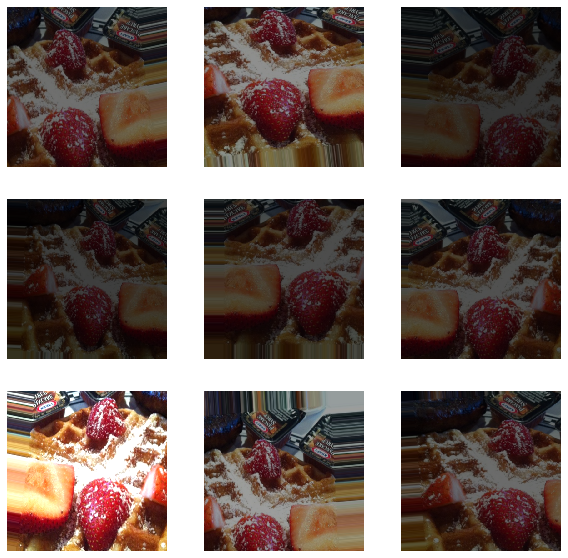

In [12]:
# making only 5 classes

# agumentations (rotation_range=90, rescale=1./255,rotation_range=90,height_shift_range=0.5,shear_range=0.1, zoom_range=0.1, horizontal_flip=True))

X5_train_datagen = ImageDataGenerator(rotation_range=10,
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2],
        fill_mode="nearest") # brightness)
X5_test_datagen = ImageDataGenerator()
X5_var_datagen = ImageDataGenerator()

mean = np.array([123.68, 116.779, 103.939], dtype="float32")
X5_train.mean = mean
X5_var.mean = mean


labels_5 = ['apple_pie','waffles','gnocchi','chocolate_mousse','baklava']

X5_train = X5_train_datagen.flow_from_directory(
    '../data/train_mini/',
    target_size=(224,224),
    color_mode="rgb",
    classes=labels_5,
    class_mode="categorical",
    batch_size=32,
    shuffle=True,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)

X5_test = X5_test_datagen.flow_from_directory(
    '../data/test_mini/',
    target_size=(224,224),
    color_mode="rgb",
    classes=labels_5,
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)
X5_var = X5_var_datagen.flow_from_directory(
    '../data/var_mini/',
    target_size=(224,224),
    color_mode="rgb",
    classes=labels_5,
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=None,
    save_to_dir=None,
    save_prefix="",
    save_format="png",
    follow_links=False,
    subset=None,
    interpolation="nearest",
)



# example of vertical shift image augmentation
print('These waffles have been: height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True')
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
# load the image
img = load_img('../data/train_mini/waffles/1005755.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
#datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = X5_train_datagen.flow(samples, batch_size=1)
# generate samples and plot
pyplot.title(label='These waffles have bee height_shift_range=0.5,shear_range=0.2, zoom_range=0.2, horizontal_flip=True')
for i in range(9):
    # define subplot
    pyplot.subplot( 330 +1 +i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.minorticks_off()
    pyplot.imshow(image)
    pyplot.axis('off')
    
# show the figure

pyplot.show()

In [4]:
from tensorflow.keras.applications import VGG16

In [5]:
# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet', input_shape=[224,224,3])
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [8]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
# extract train and val features
vgg_features_train = pretrained_model.predict(X5_train)
vgg_features_val = pretrained_model.predict(X5_var)


In [11]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#here [3] denotes for RGB images(3 channels)

#don't train existing weights
for layer in vgg.layers:
 layer.trainable = False
 
x = Flatten()(vgg.output)
prediction = Dense(10, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.compile(loss='categorical_crossentropy',
                    optimizer=optimizers.Adam(),
                    metrics=['accuracy'])
model.summary()




from datetime import datetime
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=10,
                               min_lr=0.5e-6)

checkpoint = ModelCheckpoint(filepath='mydeepmodel.h5', 
                               verbose=1, save_best_only=True)

callbacks = [checkpoint, lr_reducer]

start = datetime.now()

history = model.fit_generator(X5_train, 
                    steps_per_epoch=3500//32, 
                    epochs = 50, verbose=1, 
                    validation_data = X5_var, 
                    validation_steps = 700//2,
                             )

duration = datetime.now() - start
print("Training completed in time: ", duration)


NameError: name 'model' is not defined

In [24]:
score = model.evaluate(X5_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

ValueError: Asked to retrieve element 0, but the Sequence has length 0

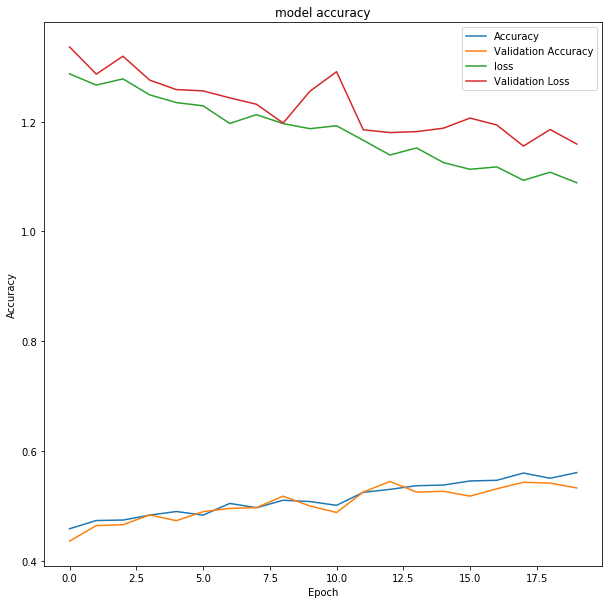

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
test_image = Image.load_img(r'../data/', color_mode ='rgb',target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)result = model.predict(test_image)

res = np.argmax(result)dict1 = {0 : 'Rohan', 1: 'Ravi', 2: 'Aman', 3: 'Nitin', 4: 'Ghnonni', 5 : 'Waffles'}print("The predicted output is :",dict1[res])

In [ ]:
 
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		# define model
		model = get_model(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=100)
		# make a prediction on the test set
		yhat = model.predict(X_test)
		# round probabilities to class labels
		yhat = yhat.round()
		# calculate accuracy
		acc = accuracy_score(y_test, yhat)
		# store result
		print('>%.3f' % acc)
		results.append(acc)
	return results
 
# load dataset
X, y = get_dataset()
# evaluate model
results = evaluate_model(X, y)
# summarize performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

In [ ]:


# from keras.preprocessing import imageimg = image.load_img("image.jpeg",target_size=(224,224))
# img = np.asarray(img)
# plt.imshow(img)
# img = np.expand_dims(img, axis=0)from keras.models import load_model
# saved_model = load_model("vgg16_1.h5")output = saved_model.predict(img)
# if output[0][0] > output[0][1]:
#     print("cat")
# else:
#     print('dog')